In [22]:
# Lets start by converting book, rating users into the appropriate rows and cols.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint


# Load the data

products_df_original = pd.read_csv("../data/books_dataset/Books.csv")
users_df_original = pd.read_csv("../data/books_dataset/Users.csv")
ratings_df_original = pd.read_csv("../data/books_dataset/Ratings.csv")

DATA_CONTEXT = "books"
VERSION = "2"
OUTPUT = "data"# Lets keep it at 30 as a treshhold.


print("products len: ", len(products_df_original), "users len: ", len(users_df_original), "ratings len: ", len(ratings_df_original))

products_df_original.head()

C:\Users\wangn\AppData\Local\Temp\ipykernel_44576\1039320808.py:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  products_df_original = pd.read_csv("../data/books_dataset/Books.csv")


products len:  271360 users len:  278858 ratings len:  1149780


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [23]:
products_df_original.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [24]:
# Convert as folllowing standarized format:

"""

products:

| name           | type | description                               |
| -------------- | ---- | ----------------------------------------- |
| id             | str  | Unique identifier of the product          |
| product_title  | str  | Title of the product                      |
| product_image  | str  | Image of the product                      |
| product_price  | int  | Price of the product (if available)  |
| product_soup   | str  | All Aggregated Description of the product |
| product_tags   | str  | List of tags of the product, sep by comma |

From:

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],

"""

products_books = products_df_original.copy()
products_books['product_id'] = products_books["ISBN"]
products_books["product_title"] = products_books["Book-Title"]
products_books["product_image"] = products_books["Image-URL-M"]
products_books["product_price"] = np.nan
products_books["product_soup"] = products_books["Book-Title"] + " " + products_books["Book-Author"] + " " + products_books["Publisher"]
products_books["product_tags"] = np.nan


products_books = products_books[["product_id", "product_title", "product_image", "product_price", "product_soup", "product_tags"]]
products_books.head()

,product_id,product_title,product_image,product_price,product_soup,product_tags
0,0195153448,Classical Mythology,http://images.amazon.com/images/P/0195153448.0...,NaN,Classical Mythology Mark P. O. Morford Oxford ...,NaN
1,0002005018,Clara Callan,http://images.amazon.com/images/P/0002005018.0...,NaN,Clara Callan Richard Bruce Wright HarperFlamin...,NaN
2,0060973129,Decision in Normandy,http://images.amazon.com/images/P/0060973129.0...,NaN,Decision in Normandy Carlo D'Este HarperPerennial,NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,http://images.amazon.com/images/P/0374157065.0...,NaN,Flu: The Story of the Great Influenza Pandemic...,NaN
4,0393045218,The Mummies of Urumchi,http://images.amazon.com/images/P/0393045218.0...,NaN,The Mummies of Urumchi E. J. W. Barber W. W. N...,NaN


In [25]:
print(ratings_df_original.columns)
ratings_df_original.head()

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [26]:
# Convert Transactions as standarized format

"""
To: 
| name       | type | description                          |
| ---------- | ---- | ------------------------------------ |
| id         | str  | Unique identifier of the transaction |
| user_id    | str  | Unique identifier of the user        |
| product_id | str  | Unique identifier of the product     |
| rate       | int  | Positive association rating          |

From: ratings_df.columns
Index(['app_id', 'helpful', 'funny', 'date', 'is_recommended', 'hours',
       'user_id', 'review_id'],
      dtype='object')
      
is recommended => 5
Otherwise if not recommended:
      # if false and hours > 40 => 4
      # if false and hours > 20 => 3
      # if false but hours > 10 => 2
      # if hours < 0 => 1

"""

transactions_products = ratings_df_original.copy()

transactions_products["id"] = list(range(1, len(transactions_products) + 1))
transactions_products["user_id"] = transactions_products["User-ID"]
transactions_products["product_id"] = transactions_products["ISBN"]
transactions_products["rate"] = transactions_products["Book-Rating"]//2

transactions_products = transactions_products[["id", "user_id", "product_id", "rate"]]

transactions_products.head()

,id,user_id,product_id,rate
0,1,276725,034545104X,0
1,2,276726,0155061224,2
2,3,276727,0446520802,0
3,4,276729,052165615X,1
4,5,276729,0521795028,3


In [27]:

print(transactions_products['rate'].value_counts())

rate
0    717879
4    171277
3    113381
5     78610
2     59878
1      8755
Name: count, dtype: int64


In [28]:
print(users_df_original.columns)
users_df_original.head()

Index(['User-ID', 'Location', 'Age'], dtype='object')


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [29]:
"""
**Users**

| name         | type | description                   |
| ------------ | ---- | ----------------------------- |
| id           | str  | Unique identifier of the user |
| age          | int  | Age of                        |
| details_soup | str  | All Aggregated Description of |

From:
Index(['User-ID', 'Location', 'Age'], dtype='object')

"""

def create_soup(row):
    message = ""
    # Add if not nan or empty
    if row["Age"] != "" and not np.isnan(row["Age"]):
        message += "Age: " + str(row["Age"]) + " "
    if row["Location"] != "" and not pd.isnull(row["Location"]):
        message += "Location: " + row["Location"] + " "
    return message

users_products = users_df_original.copy()
users_products["id"] = users_products["User-ID"]
users_products["age"] = users_products["Age"]
users_products["details_soup"] = users_products.apply(create_soup, axis=1)

users_products = users_products[["id", "age", "details_soup"]]
users_products.head()



,id,age,details_soup
0,1,NaN,"Location: nyc, new york, usa"
1,2,18.0,"Age: 18.0 Location: stockton, california, usa"
2,3,NaN,"Location: moscow, yukon territory, russia"
3,4,17.0,"Age: 17.0 Location: porto, v.n.gaia, portugal"
4,5,NaN,"Location: farnborough, hants, united kingdom"


In [30]:

# remove products where under x interactions in total.

def remove_under_interactions(df, col_name, threshhold=10):
    # Find id of products where total aggregated mentions in transactiosn is less than 50.
    counts = df[col_name].value_counts()
    df = df[df[col_name].isin(counts[counts > threshhold].index)]
    return df




In [31]:
print(len(transactions_products))
print('unique products:', len(transactions_products["product_id"].unique()))
print('unique users:', len(transactions_products["user_id"].unique()))

transactions = transactions_products

1149780
unique products: 340556
unique users: 105283


In [41]:


def get_guaranteed_features(dataframe):
    # where features are guaranteed not  benull
    features = []
    for column in dataframe.columns:
        if not dataframe[column].isnull().any():
            features.append(column)
    return features

def clean_with_treshhold(user_treshhold, product_treshold, original_transactions, products, save_as_append="", verbose=False, users_df=None, products_df=None):
    """
    Iteratively removes transactions until user and product transactions meet the criteria.
    """
    results_dict = {}

    prev_transaction_count = -1
    transactions = original_transactions
    
    if verbose:
        print('Start count of transactions', len(original_transactions))
        print("Unique books: ", len(transactions["product_id"].unique()))
        print("Unique users: ", len(transactions["user_id"].unique()))

    while(prev_transaction_count != len(transactions)):
        transactions = remove_under_interactions(transactions, "product_id", product_treshold)
        transactions = remove_under_interactions(transactions, "user_id", user_treshhold)
        prev_transaction_count = len(transactions)

    if verbose:
        print('final count of transactions', len(transactions) )
        print("Unique books: ", len(transactions["product_id"].unique()))
        print("Unique users: ", len(transactions["user_id"].unique()))
    
    # Products
    products = products[products["product_id"].isin(transactions["product_id"].unique())]
    
    
    # Save.
    if save_as_append != "":
        # sort products by times they appear at transactions
        # Count the times each product appears in transactions
        unique_name = f"{save_as_append}_v{VERSION}_t{user_treshhold}_p{product_treshold}"
        
        product_counts = transactions["product_id"].value_counts()

        # Create a new dataframe with products sorted by count
        sorted_products = product_counts.reset_index()
        sorted_products.columns = ['product_id', 'count']
        # Merge this with the original products dataframe to keep the order
        products_books = products.merge(sorted_products, on='product_id', how='left').sort_values(by='count', ascending=False)
        products_books['id'] = products_books['product_id']
        products_books.to_csv(f"../{OUTPUT}/products{unique_name}.csv", index=False)

        transactions_books = transactions.copy()
        transactions_books.to_csv(f"../{OUTPUT}/transactions{unique_name}.csv", index=False)

        product_features = get_guaranteed_features(products_books)
        transaction_features = get_guaranteed_features(transactions_books)
        
        results_dict = {
            "data_context": DATA_CONTEXT,
            "product_filepath": f"{OUTPUT}/products{unique_name}.csv",
            "transactions_filepath": f"{OUTPUT}/transactions{unique_name}.csv",
            "product_features": product_features,
            "transaction_features": transaction_features,
            "product_count": len(products_books),
            "product_unique_count": len(products_books["product_id"].unique()), 
            
            "transaction_count": len(transactions_books),
            "version": VERSION,
            "unique_name": unique_name
        }
        
        if users_df is not None:
            users = users_df[users_df["id"].isin(transactions["user_id"].unique())]
            users.to_csv(f"../{OUTPUT}/users{save_as_append}.csv", index=False)
            users_features = get_guaranteed_features(users)
            results_dict["user_filepath"] = f"{OUTPUT}/users{unique_name}.csv"
            results_dict["user_features"] = users_features
            results_dict["user_count"] = len(users)
            
            
        
    
    return (transactions, results_dict)



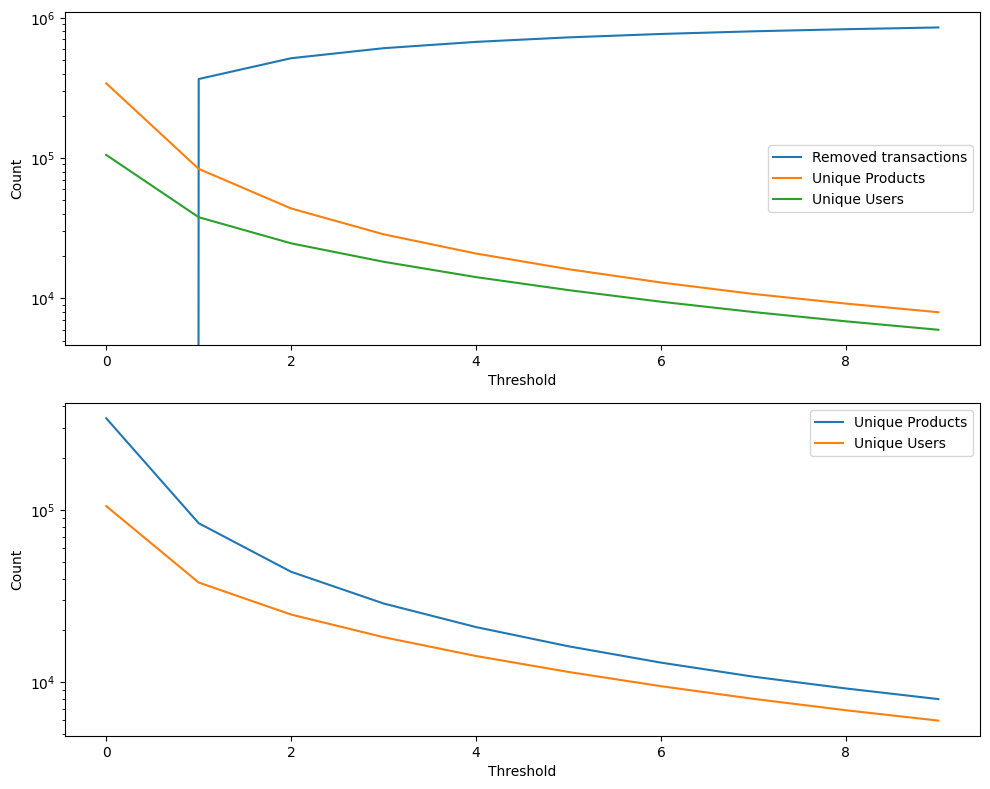

,treshhold users,treshhold products,transactions count,removed_transactions,unique_products,unique_users
0,1,2,784266,365514,83746,37898
1,2,4,635732,514048,43742,24697
2,3,6,543854,605926,28638,18253
3,4,8,477737,672043,20891,14191
4,5,10,426233,723547,16161,11468
5,6,12,384677,765103,12992,9480
6,7,14,350489,799291,10768,8006
7,8,16,322653,827127,9197,6874
8,9,18,298498,851282,7979,5985


In [37]:
# Chart how many books are removed if treshhold increases from 20 - 200 by 10

import matplotlib.pyplot as plt

removed_transactions = [0]
unique_books = [len(transactions_products["product_id"].unique())]
unique_products = [len(transactions_products["user_id"].unique())]
array_counts = []
MULTIPLIER_BOOKS = 2
for i in range(1, 10, 1):
    # user_treshhold, product_treshold, original_transactions, products, save_as_append=""):
    transactions, _ = clean_with_treshhold(i, i*MULTIPLIER_BOOKS, transactions_products, products_books)
    # print(i, len(transactions_books) - len(transactions)) 
    removed_transactions.append(len(transactions_products) - len(transactions))
    unique_books.append(len(transactions["product_id"].unique()))
    unique_products.append(len(transactions["user_id"].unique()))
    array_counts.append({"treshhold users": i, "treshhold products": i*MULTIPLIER_BOOKS, "transactions count": len(transactions), "removed_transactions": len(transactions_products) - len(transactions), "unique_products": len(transactions["product_id"].unique()), "unique_users": len(transactions["user_id"].unique() )})


# Create subplots with 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the removed transactions, unique books, and unique users on the first subplot
ax1.plot(removed_transactions)
ax1.plot(unique_books)
ax1.plot(unique_products)

# Plot a closer look at unique books and unique users on the second subplot
ax2.plot(unique_books)
ax2.plot(unique_products)

# Set labels and legend
ax1.legend(["Removed transactions", "Unique Products", "Unique Users"])
ax1.set_xlabel("Threshold")
ax1.set_ylabel("Count")

ax2.legend(["Unique Products", "Unique Users"])
ax2.set_xlabel("Threshold")
ax2.set_ylabel("Count")


# Set y-axis to logarithmic scale
ax1.set_yscale('log')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

# show dataframe.
df_counts = pd.DataFrame(array_counts)
df_counts.head(10)


In [42]:


DATA_CONTEXT = "books"
VERSION = "2"
OUTPUT = "data"# Lets keep it at 30 as a treshhold.

transactions, results_dict = clean_with_treshhold(4, 8, transactions_products, products_books, save_as_append=f"_{DATA_CONTEXT}", verbose=True, users_df=users_products)
pprint.pprint(results_dict)

Start count of transactions 1149780
Unique books:  340556
Unique users:  105283
final count of transactions 477737
Unique books:  20891
Unique users:  14191
{'data_context': 'books',
 'product_count': 19897,
 'product_features': ['product_id',
                      'product_title',
                      'product_image',
                      'product_soup',
                      'count',
                      'id'],
 'product_filepath': 'data/products_books_v2_t4_p8.csv',
 'product_unique_count': 19897,
 'transaction_count': 477737,
 'transaction_features': ['id', 'user_id', 'product_id', 'rate'],
 'transactions_filepath': 'data/transactions_books_v2_t4_p8.csv',
 'unique_name': '_books_v2_t4_p8',
 'user_count': 14191,
 'user_features': ['id', 'details_soup'],
 'user_filepath': 'data/users_books_v2_t4_p8.csv',
 'version': '2'}
